# Exploring the Video Games Sales & Ratings Dataset
### A CSMODEL Case Study

**Section** X22 <br>
**Group 11**
*  Jonaviene DG. Capunitan
*  Katriel R. Santos
* Matthew James D. Villarica



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## I. Dataset Description

The dataset is a collection of [Video Game Sales and Ratings](https://www.kaggle.com/datasets/kendallgillies/video-game-sales-and-ratings) as of January 2017 taken from Kaggle.

### Dataset Collection Process and Implications

The dataset was collected through web scraping from both VGChartz and Metacritic. VGChartz is a video game sales tracking website known for its scale and credibility, providing a reliable source of sales figures for old video games and new releases. Metacritic is a popular site for rating and reviewing movies, series, video games and other media where both critics and users discuss and rate their favorite video games. For some video games, the year of release was missing from the combined scrape which which were manually entered instead. Since data was scraped from reliable sources for both the video game scores and information on the video games themselves and their sales figures, the conclusions that can be drawn from the data set should be reliable.

### Reading the Dataset

In [ ]:
raw_df = pd.read_csv("Video_Game_Sales_as_of_Jan_2017.csv")
# url = 'https://raw.githubusercontent.com/eneii313/VGRS_Case_Study/main/Video_Game_Sales_as_of_Jan_2017.csv'
# raw_df = pd.read_csv(url)
display(raw_df.head())
print('Number of observations: ',len(raw_df))

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


Number of observations:  17416


There are a total of 17,416 observations in the dataset, with each row representing a video game released on or before January 2017. Let's take a look at a list of each variable.

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


There are 15 variables that provide a description of each game including their performance in terms of sales accross the world and in user and critic ratings and other categorical data that sets it apart from other games. We will now be taking a look at what each variable represents.

In [ ]:
raw_df['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Ashita no Joe 2: The Anime Super Remix',
       'NadePro!! Kisama no Seiyuu Yatte Miro!',
       'Brian Lara 2007 Pressure Play'], dtype=object)

The `Name` of a video game is the title of each video game in the data set.

In [ ]:
raw_df['Platform'].unique()

array(['Wii', 'NES', 'G', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'X', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

The `Platform` of a video game is the device the game is playable on, which can include consoles like the Wii and PS3, handhelds like the GBA (Gameboy Advance) and PSP, and computers represented as PC.

In [ ]:
raw_df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2015.,
       2011., 1998., 2012., 2014., 2016., 1992., 1997., 1993., 1994.,
       1982., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983., 1978., 1977., 1976., 1979.,   nan, 2017.])

The `Year_of_Release` is the year a videogame was released to be bought by the public. The most recent games are games released in 2017, and some of the oldest games in the dataset were released way back in the late 1970s.

In [ ]:
raw_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

The `Genre` of a video game describes the kind of gameplay you can expect in a video game, its a good way to categorize video games into different niches and there are usually fans of each specific genre. Strategy games usually require strategic and tactical thinking and Adventure games focus on exploration within the game world. Video games are categorized into 12 different genres in this dataset.

In [ ]:
raw_df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Electronic Arts', 'Bethesda Softworks', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Codemasters', 'Majesco Entertainment', 'Red Or', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',
      

The `Publisher` of each video game is responsible for publishing the video game and is usually involved in marketing, management and have invested resources and funds into the development of the video game.

In [ ]:
print('North America Sales')
print(raw_df['NA_Sales'])
print('Japan Sales')
print(raw_df['JP_Sales'])
print('Europe Sales')
print(raw_df['EU_Sales'])
print('Other Sales')
print(raw_df['Other_Sales'])
print('Global Sales')
print(raw_df['Global_Sales'])

North America Sales
0        41.36
1        29.08
2        15.68
3        15.61
4        11.27
         ...  
17411     0.00
17412     0.00
17413     0.00
17414     0.00
17415     0.00
Name: NA_Sales, Length: 17416, dtype: float64
Japan Sales
0         3.77
1         6.81
2         3.79
3         3.28
4        10.22
         ...  
17411     0.00
17412     0.00
17413     0.01
17414     0.01
17415     0.00
Name: JP_Sales, Length: 17416, dtype: float64
Europe Sales
0        28.96
1         3.58
2        12.80
3        10.95
4         8.89
         ...  
17411     0.00
17412     0.00
17413     0.00
17414     0.00
17415     0.00
Name: EU_Sales, Length: 17416, dtype: float64
Other Sales
0        8.45
1        0.77
2        3.29
3        2.95
4        1.00
         ... 
17411    0.00
17412    0.00
17413    0.00
17414    0.00
17415    0.00
Name: Other_Sales, Length: 17416, dtype: float64
Global Sales
0        82.54
1        40.24
2        35.57
3        32.78
4        31.37
         ...  
1741

There are 5 variables that represent sales in different areas. All the sales of each video game are floating point decimal numbers, representing the amount of copies sold in millions in the specified area.


*   `NA_Sales` are sales in North America.
*   `EU_Sales` are sales in Europe.
*   `JP_Sales` are sales in Japan.
*   `Other_Sales` are sales in the rest of the world.
*   `Global_Sales` are total sales worldwide.




In [ ]:
raw_df['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 85., 93., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 57., 48., 29., 47.,
       65., 54., 20., 37., 53., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

The `Critic_Score` is the aggregate score of critics on Metacritic, with each score being a scale from 0 to 100. It is represented as a floating point number since there are several `NaN` values. Metacritic is a popular website for collecting reviews on movies, shows, and video games. Critics verified on the website are generally more recognized for having more credible opinions and ratings compared to users.

In [ ]:
raw_df['Critic_Count'].unique()

array([ 51.,  nan,  73.,  65.,  41.,  80.,  64.,  63.,  45.,  33.,  50.,
        58.,  62.,  37.,  54.,  81.,  89.,  21., 100.,  66.,  39.,  56.,
        57.,  86.,  74.,  16.,  82.,  67.,  29.,  15.,  70.,  99.,  87.,
        20.,  23.,  24.,  10.,  27.,  42.,  91.,  53.,  75.,  46.,  84.,
       113.,  38.,  12.,  90.,  97.,  44., 105.,  77.,  68.,  28.,  96.,
        94.,  61.,  22.,  88.,  47.,  98.,  85.,  13.,   8.,  14.,  95.,
        17.,  35.,  19.,  48.,  52.,  83.,  72.,  30.,  69.,  76.,  18.,
        34.,  40., 101.,  78.,   9.,  32.,  36.,  25.,  59.,  79.,  26.,
        49.,  60.,  11., 102.,  31.,  43., 107.,   7.,  71.,  55.,  92.,
         4.,  93.,   5.,   6., 103., 106.,   3., 104.])

The `Critic_Count` is the amount of critics cores used to come up with the `Critic_Score`.

In [ ]:
raw_df['User_Score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 8.8, 7.5, 2.6,
       7.2, 7. , 9.2, 7.3, 4.9, 4.3, 6.5, 7.6, 5.7, 9.1, 6.9, 9.4, 6.8,
       3.5, 6.1, 5.4, 4. , 6.2, 4.5, 9.3, 4.2, 6. , 6.7, 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 5.9, 4.6, 3.9, 3.1, 2.9, 5.2, 5. , 5.1, 3.3, 4.7,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 9.6, 1.8, 3.8,
       0. , 1.6, 2.4, 1.7, 1.1, 1. , 0.3, 1.5, 1.2, 0.2, 2.3, 0.5, 1.3,
       0.6, 1.4, 0.9, 0.7, 9.7])

The `User_Score` is the aggregate score given by Metacritic's subscribers. Each on a scale from 0 to 10 as a floating point number since each `User_Score` is the mean of all user's scores for a given game.

In [ ]:
raw_df['User_Count']

0        324.0
1          NaN
2        712.0
3        193.0
4          NaN
         ...  
17411      NaN
17412      NaN
17413      NaN
17414      NaN
17415      NaN
Name: User_Count, Length: 17416, dtype: float64

The `User_Count` is the amount of Metacritic user scores used to come up with the `User_Score`. 

In [ ]:
raw_df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

The `Rating` is the Entertainment Software Rating Board (ESRB) rating which determines the recommended audience and age of players of the videogame.

## II. General Data Cleaning

In this section, we will make sure that the dataset does not contain any incosistensies that may affect the results of the analysis. More specific data cleaning will be done in future sections that require it. Since we have access to the dataset's source, [VGChartz](https://www.vgchartz.com/gamedb/), we will be using it to reference any missing values, if needed.

### Checking for `NaN`s

In [ ]:
raw_df.isnull().any()

Name               False
Platform           False
Year_of_Release     True
Genre              False
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Rating              True
dtype: bool

This study will mainly focus on the different `Sales` variables. Therefore, it is alright to leave `Critic_Score`, `Critic_Count`, `User_Score`, `User_Count` and `Rating` to have `NaN` values. The relevant variables with null values are `Year_of_Release` and `Publisher`. Let us first get the observations that have a null value for `Year_of_Release`.

In [ ]:
null_year_df = raw_df[raw_df['Year_of_Release'].isnull()]
display(null_year_df)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
12795,Mobile Ops: The One Year War,X360,NaN,Simulation,Namco Bandai Games,0.0,0.00,0.06,0.0,0.06,NaN,NaN,NaN,NaN,NaN
14210,Housekeeping,DS,NaN,Action,Unknown,0.0,0.00,0.04,0.0,0.04,NaN,NaN,NaN,NaN,NaN
14532,Fullmetal Alchemist: Brotherhood,PSP,NaN,Action,Unknown,0.0,0.00,0.03,0.0,0.03,NaN,NaN,NaN,NaN,NaN
15162,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.00,0.02,0.0,0.02,NaN,NaN,NaN,NaN,NaN
15784,Writing and Speaking Beautiful Japanese DS,DS,NaN,Misc,Unknown,0.0,0.00,0.02,0.0,0.02,NaN,NaN,NaN,NaN,NaN
16176,Ferrari: The Race Experience,Wii,NaN,Racing,System 3 Arcade Software,0.0,0.01,0.00,0.0,0.02,54.0,4.0,NaN,NaN,E
16953,Sumioni,PSV,NaN,Action,NaN,0.0,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN
17271,Free Running,PSP,NaN,Sports,Reef Entertainment,0.0,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,T


There are 8 observations with a null value for `Year_of_Release`. This seems to be a data collection error, since searching for these titles in VGChartz have release dates listed for each of them. Since there are only a few with this issue, we can simply add the correct value for each of them.

References: <br>
[Mobile Ops: The One Year War](https://www.vgchartz.com/game/24246/mobile-ops-the-one-year-war/?region=All) <br>
[Housekeeping](https://www.vgchartz.com/game/3497/housekeeping/?region=All) <br>
[Fullmetal Alchemist: Brotherhood](https://www.vgchartz.com/game/37307/fullmetal-alchemist-brotherhood/?region=All) <br>
[Wii de Asobu: Metroid Prime](https://www.vgchartz.com/game/27348/wii-de-asobu-metroid-prime/?region=All) <br>
[Writing and Speaking Beautiful Japanese DS](https://www.vgchartz.com/games/commentwall.php?id=4750) <br>
[Ferrari: The Race Experience](https://www.vgchartz.com/game/47029/ferrari-the-race-experience/?region=All) <br>
[Free Running](https://www.vgchartz.com/game/22809/free-running/?region=All)

In [ ]:
raw_df.loc[12795,'Year_of_Release'] = 2008
raw_df.loc[14210,'Year_of_Release'] = 2006
raw_df.loc[14532,'Year_of_Release'] = 2009
raw_df.loc[15162,'Year_of_Release'] = 2009
raw_df.loc[15784,'Year_of_Release'] = 2008
raw_df.loc[16176,'Year_of_Release'] = 2010
raw_df.loc[17271,'Year_of_Release'] = 2007

Only one video game, [Sumioni](https://www.vgchartz.com/game/63722/sumioni/?region=All), does not have a listed release date. Coincidentally, it is also the game that has a null value in the `Publisher` variable. Thus, we can replace its value with the mean `Year_of_Release` and add the correct value for its `Publisher`.

In [ ]:
raw_df.loc[16953,'Year_of_Release'] = round(raw_df['Year_of_Release'].mean(), 0)
raw_df.loc[16953,'Publisher'] = 'Acquire'

Since there are no longer missing values in `Year_of_Release`, we can convert the variable values into an integer.

In [ ]:
raw_df['Year_of_Release'] = raw_df['Year_of_Release'].astype(np.int64)

### Checking for Inconsistent Categorical Values

The dataset has 3 categorical variables that have limited values: `Platform`, `Genre`, and `Rating`.

#### `Platform` variable

In [ ]:
raw_df['Platform'].unique()

array(['Wii', 'NES', 'G', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'X', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

The unique values of the `Platform` variable represent the platform codes in [VGChartz](https://www.vgchartz.com/charts/platform_totals/Hardware.php/). They are all valid, with `G` and `X` representing `GB` and `XB`, respectively.

#### `Genre` variable

In [ ]:
raw_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

There are no misspelled values and are all valid genres listed in VGChartz.

#### `Rating` Variable

In [ ]:
raw_df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

There are currently 7 ESRB ratings according to [IGN](https://www.ign.com/wikis/content-ratings/ESRB). All of the `Rating` non-null values are valid rating summaries apart from `K-A`. `K-A` (Kids-Adults) is the old term for the `E` (Everyone) rating. Thus, `K-A` values will be replaced by `E`.

In [ ]:
raw_df['Rating'] = raw_df['Rating'].replace({'K-A': 'E'})
raw_df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

### Checking for Duplicates

Let us first check if there are any duplicate `Name` values.

In [ ]:
duplicate_names = raw_df['Name'].value_counts().reset_index(name='Count').query('Count > 1').sort_values(['Count', 'index'])
display(duplicate_names)
print('Duplicate Names: ', len(duplicate_names))
print('Total Number of Observations with Duplicate Names: ', duplicate_names['Count'].sum())

,index,Count
2640,007: The World is not Enough,2
2141,11eyes: CrossOver,2
1635,18 Wheeler: American Pro Trucker,2
2652,187: Ride or Die,2
1994,2 in 1 Combo Pack: Sonic Heroes / Super Monkey...,2
...,...,...
4,LEGO Marvel Super Heroes,9
1,Madden NFL 07,9
2,Madden NFL 08,9
5,Ratatouille,9


Duplicate Names:  2896
Total Number of Observations with Duplicate Names:  8232


There are 2,896 video game titles that have more than one observation and a total of 8,232 observations with duplicate titles. Let's take a closer look at the observations with the most duplicated title: `Need for Speed: Most Wanted`.

In [ ]:
need_for_speed_observations = raw_df[raw_df['Name'] == 'Need for Speed: Most Wanted'].sort_values('Year_of_Release')
need_for_speed_observations

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
259,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,82.0,36.0,9.1,138.0,T
1601,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,8.4,135.0,T
2007,Need for Speed: Most Wanted,X,2005,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04,83.0,32.0,8.8,29.0,T
3603,Need for Speed: Most Wanted,GC,2005,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56,80.0,18.0,9.1,23.0,T
6005,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.04,0.29,82.0,19.0,8.5,531.0,T
6444,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27,45.0,4.0,6.1,22.0,E
6509,Need for Speed: Most Wanted,GBA,2005,Racing,Electronic Arts,0.19,0.07,0.00,0.00,0.26,NaN,NaN,8.3,14.0,E
529,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.71,1.46,0.06,0.58,2.81,NaN,NaN,NaN,NaN,NaN
1198,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,8.4,135.0,T
2036,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.33,0.46,0.01,0.22,1.02,NaN,NaN,NaN,NaN,NaN


Closely examining the observations above reveals that the observations with the title `Need for Speed: Most Wanted` are similar in `Name`, `Genre`, and `Publisher`. Meanwhile, their values in the `Platform` and `Year_of_Release` columns vary. This may be due to the fact that the same game can be published across different platforms, which could affect the game's performance and sales. Some games may also receive remakes with the same name, which is considered to be a different game from the original. Therefore, observations with duplicate titles will be considered as separate observations.

With these in mind, let us check if there are any duplicate titles with the same values for `Platform` and `Year_of_Release`.

In [ ]:
duplicates = raw_df[['Name', 'Platform', 'Year_of_Release']].value_counts().reset_index(name='Count').query('Count > 1').sort_values(['Count', 'Name'])
display(duplicates)

print('Duplicate Observations: ', len(duplicates))
print('Total Number of Observations with Duplicates: ', duplicates['Count'].sum())

,Name,Platform,Year_of_Release,Count
1,Madden NFL 13,PS3,2012,2
0,Sonic the Hedgehog,PS3,2006,2
2,SoulCalibur IV,X360,2008,2


Duplicate Observations:  3
Total Number of Observations with Duplicates:  6


There are 3 video games that have the duplicate values for `Name`, `Platform`, and `Year_of_Release`.

In [ ]:
duplicate_df = pd.merge(duplicates, raw_df, how='inner')
duplicate_df.drop(['Count'], axis=1, inplace=True)
display(duplicate_df)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.12,0.22,0.00,0.23,2.57,83.0,22.0,5.5,101.0,E
1,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01,83.0,22.0,5.5,101.0,E
2,Sonic the Hedgehog,PS3,2006,Platform,Sega,0.41,0.06,0.04,0.66,1.16,43.0,17.0,4.1,177.0,E10+
3,Sonic the Hedgehog,PS3,2006,Platform,Sega,0.00,0.48,0.00,0.00,0.48,43.0,17.0,4.1,177.0,E10+
4,SoulCalibur IV,X360,2008,Fighting,Ubisoft,0.92,0.43,0.07,0.15,1.58,85.0,62.0,7.9,158.0,T
5,SoulCalibur IV,X360,2008,Fighting,Namco Bandai Games,0.00,0.00,0.00,0.00,0.01,85.0,62.0,7.9,158.0,T


Both `Madden NFL 13` and `Sonic the Hedgehog` have similar values to their duplicate apart from their total sales. We can also assume that the observations for `SoulCalibur IV` represents the same game, as it has similar values apart from sales and publisher. The original publisher is listed as 'Namco Bandai' in [VGChartz](https://www.vgchartz.com/games/games.php?name=SoulCalibur+IV&keyword=&console=&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=No&results=50&order=Sales&showtotalsales=0&showpublisher=0&showpublisher=1&showvgchartzscore=0&showvgchartzscore=1&shownasales=0&showdeveloper=0&showcriticscore=0&showcriticscore=1&showpalsales=0&showreleasedate=0&showreleasedate=1&showuserscore=0&showuserscore=1&showjapansales=0&showlastupdate=0&showlastupdate=1&showothersales=0&showshipped=0&showshipped=1), so we shall keep this value. For the total sales, we will combine the sales of each game and replace the old values in the dataframe with the new, combined ones.

In [ ]:
agg_functions = {'Publisher': 'last', 'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum', 'Global_Sales': 'sum', 
                 'Critic_Score':'first', 'Critic_Count':'first', 'User_Score':'first', 'User_Count':'first','Rating': 'first'}
combined_df = duplicate_df.groupby(['Name', 'Platform', 'Year_of_Release', 'Genre'], as_index=False).agg(agg_functions) 
combined_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.12,0.23,0.00,0.23,2.58,83.0,22.0,5.5,101.0,E
1,Sonic the Hedgehog,PS3,2006,Platform,Sega,0.41,0.54,0.04,0.66,1.64,43.0,17.0,4.1,177.0,E10+
2,SoulCalibur IV,X360,2008,Fighting,Namco Bandai Games,0.92,0.43,0.07,0.15,1.59,85.0,62.0,7.9,158.0,T


In [ ]:
cleaned_df = raw_df.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)
cleaned_df = pd.concat([cleaned_df, combined_df])
cleaned_df.info()

#Check for Duplicates
duplicates = cleaned_df[['Name', 'Platform', 'Year_of_Release']].value_counts().reset_index(name='Count').query('Count > 1').sort_values(['Count', 'Name'])
print('Number of duplicate observations: ', len(duplicates))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17413 entries, 0 to 2
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17413 non-null  object 
 1   Platform         17413 non-null  object 
 2   Year_of_Release  17413 non-null  int64  
 3   Genre            17413 non-null  object 
 4   Publisher        17413 non-null  object 
 5   NA_Sales         17413 non-null  float64
 6   EU_Sales         17413 non-null  float64
 7   JP_Sales         17413 non-null  float64
 8   Other_Sales      17413 non-null  float64
 9   Global_Sales     17413 non-null  float64
 10  Critic_Score     8333 non-null   float64
 11  Critic_Count     8333 non-null   float64
 12  User_Score       7795 non-null   float64
 13  User_Count       7795 non-null   float64
 14  Rating           10249 non-null  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 2.1+ MB
Number of duplicate observations:  0


With this, we have a cleaned dataset where every observation is a unique entry and without missing values in the relevant variables.

## III. Exploratory Data Analysis

##EDA Question 1: Which genres have the highest and lowest amount of sales in each region?

A video game genre is a specific category of games based on similar gameplay characteristics. Different people have different preferences for video game genres, making it a deciding factor on whether someone buys a game or not. We will explore which genre has the highest and lowest amount of sales in each region.

The variables of interest are:
- **`Genre`**: the genre of the video game
- **`NA_Sales`**: sales in North America (in millions)
- **`EU_Sales`**: sales in Europe (in millions)
- **`JP_Sales`**: sales in Japan (in millions)
- **`Other_Sales`**: sales in the rest of the world (in millions)
- **`Global_Sales`**: total worldwide sales (in millions)

First, let us see which genres have the highest overall sales and visualize the values with a bar plot.

In [ ]:
genre_sales_count = cleaned_df.groupby('Genre').agg({'Global_Sales': 'sum'})
genre_sales_count = genre_sales_count.sort_values('Global_Sales', ascending=False)
display(genre_sales_count)

,Global_Sales
Genre,
Action,1761.97
Sports,1341.00
Shooter,1067.30
Role-Playing,949.31
Platform,831.74
Misc,808.80
Racing,731.67
Fighting,449.17
Simulation,392.84


Text(0.5, 1.0, 'Bar plot of video game count per genre')

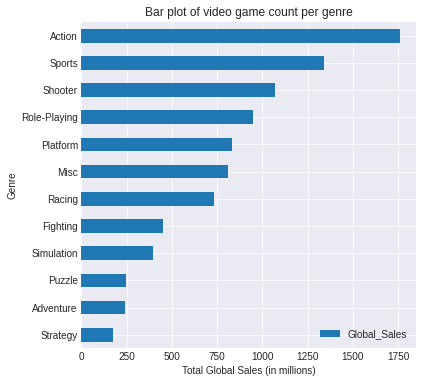

In [ ]:
genre_sales_count.plot.barh(figsize=(6,6)).invert_yaxis()
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Genre')
plt.title('Bar plot of video game count per genre')

We can see that the three most popular video game genres are `Action`, `Sports`, and `Shooter`. The `Action` genre has the most global sales with 1761.97 million sales, which is equivalent to 1.76 billion sales.

Meanwhile, the three least popular genres are `Strategy`, `Adventure` and `Puzzle`. The `Strategy` genre has the lowest global sales with only 175.72 million sales, equating to 0.18 billion sales.

Let us see if these rankings hold true in each region by getting the total amount of sales per region in each genre.

In [ ]:
regional_sales_by_genre_df = cleaned_df.groupby('Genre').agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum'})
regional_sales_sum = regional_sales_by_genre_df.sum()
regional_sales_by_genre_df = regional_sales_by_genre_df.T
display(regional_sales_by_genre_df)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,885.32,106.25,224.13,409.81,446.84,123.14,360.51,336.74,600.01,182.69,688.60,68.93
EU_Sales,525.31,64.43,100.74,214.64,201.87,50.22,237.60,193.51,321.82,114.94,380.16,45.66
JP_Sales,163.65,53.90,87.88,108.68,131.37,57.39,56.84,358.02,39.02,64.12,135.80,49.87
Other_Sales,186.56,16.76,36.51,74.91,51.38,12.40,76.38,61.11,106.03,30.86,135.70,10.94


Using the values above, we can visualize the total number of sales of each genre by region by using bar plots.

Text(0.5, 1.0, 'Total NA Sales in each Genre')

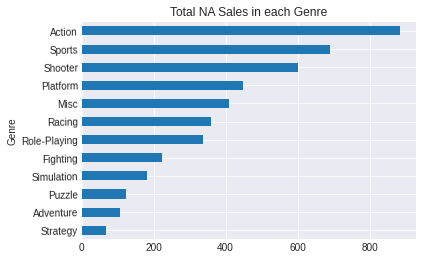

In [ ]:
display(regional_sales_by_genre_df.iloc[0].sort_values().plot.barh(rot=1))
plt.title('Total NA Sales in each Genre')

Text(0.5, 1.0, 'Total EU Sales in each Genre')

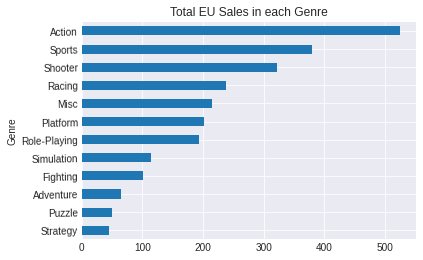

In [ ]:
display(regional_sales_by_genre_df.iloc[1].sort_values().plot.barh(rot=1))
plt.title('Total EU Sales in each Genre')

Text(0.5, 1.0, 'Total JP Sales in each Genre')

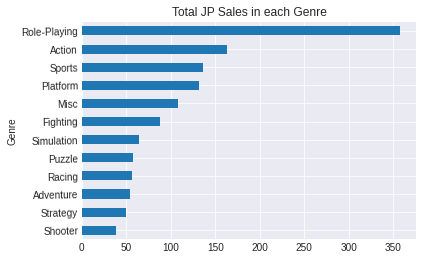

In [ ]:
display(regional_sales_by_genre_df.iloc[2].sort_values().plot.barh(rot=1))
plt.title('Total JP Sales in each Genre')

display(regional_sales_by_genre_df.iloc[1].sort_values().plot.barh(rot=1))
plt.title('Total NA Sales in each Genre')

Text(0.5, 1.0, 'Total Other Region Sales in each Genre')

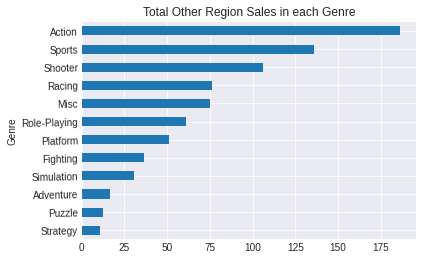

In [ ]:
display(regional_sales_by_genre_df.iloc[3].sort_values().plot.barh(rot=1))
plt.title('Total Other Region Sales in each Genre')

Text(0.5, 1.0, 'Total Sales in each Genre by Region')

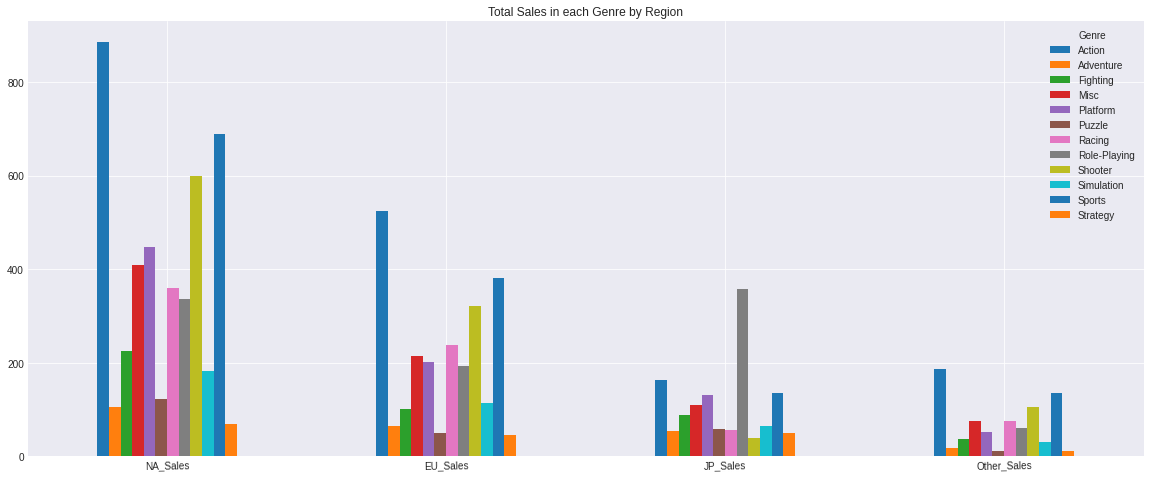

In [ ]:
regional_sales_by_genre_df.plot.bar(figsize=(20,8), rot=1)
plt.title('Total Sales in each Genre by Region')

Based on the bar plots above, the top three genres for North America, Europe and Other regions match with the top three genres in global sales, being `Action`, `Sports`, and `Shooter`, respectively. The `Action` genre indeed has the most sales in North America with 885.32 million, Europe with 525.31 million, and Other regions with 186.56 million. Meanwhile, the lowest sales in the three regions also match the three lowest in global sales, being `Strategy`, `Puzzle`, and `Adventure`. `Strategy` has the lowest sales in all three regions with only 68.93 million in North America, 45.66 million in Europe, and 10.94 million in Other regions. `Puzzle` is the second lowest in Europe and Other regions, and `Adventure` in North America.

Interestingly, the `Role-Playing` genre has the most sales in Japan with 358.02 million, even if it is only the 4th most popular genre in global sales. The next most sales in Japan are `Action` and `Sports`, respectively. Meanwhile, Japan's lowest sales belongs to the `Shooter` genre with only 39.02 million, which has the second highest sales in the other regions. The next lowest sales in Japan are `Strategy` and `Aventure`, respectively.

Here are other interesting observations:
- `Misc` has the fifth highest sales in all regions, despite it only being sixth in the overall global sales.
- Europe and Other regions have the most similar rankings, with eight out of twelve genres having the same rank.
- `Action` and `Sports` are always in the top three highest sales in each region. Meanwhile, `Strategy` and `Adventure` are always in the bottom three.


## EDA Question 2: Do Nintendo video games have higher sales in Japan relative to other publishers?

Nintendo is a Japanese game company that is well known worldwide for iconic video game franchises like Super Mario. It is assumed that because of Nintendo's worldwide appeal in the gaming industry, Nintendo games must be one of the best selling publishers in their home country as well, which is Japan. We will be exploring if this assumption holds true for this data set.

The variables of interest are:
- **`JP_Sales`**: sales in Japan (in millions)
- **`Publisher`**: publisher of the game

In [ ]:
agg_df = cleaned_df.groupby('Publisher').agg({"JP_Sales": ["mean", "std", "median"]})
agg_df

JP_Sales                 
                                 mean       std median
Publisher                                             
10TACLE Studios                  0.00  0.000000   0.00
1C Company                       0.00  0.000000   0.00
20th Century Fox Video Games     0.00  0.000000   0.00
2D Boy                           0.00       NaN   0.00
3 O'Clock                        0.03       NaN   0.03
...                               ...       ...    ...
id Software                      0.00       NaN   0.00
imageepoch Inc.                  0.02  0.014142   0.02
inXile Entertainment             0.00       NaN   0.00
mixi, Inc                        0.88       NaN   0.88
responDESIGN                     0.00  0.000000   0.00

[627 rows x 3 columns]

Some Publishers have a mean, standard deviation, and median of 0. These are going to be dropped because this means the publisher had none of their games reach 10,000 `JP_Sales` in the data set.

In [ ]:
agg_df = agg_df[(agg_df['JP_Sales', 'mean'] != 0) & (agg_df['JP_Sales', 'median'] != 0) & (agg_df['JP_Sales', 'std'] != 0)]
agg_df

JP_Sales                 
                         mean       std median
Publisher                                     
3 O'Clock            0.030000       NaN  0.030
5p                   0.021818  0.017911  0.020
AQ Interactive       0.022000  0.014832  0.020
ASCII Entertainment  0.470000  0.522887  0.300
ASCII Media Works    0.028000  0.017512  0.020
...                       ...       ...    ...
Zenrin               0.030000  0.014142  0.030
dramatic create      0.017000  0.008233  0.015
fonfun               0.020000       NaN  0.020
imageepoch Inc.      0.020000  0.014142  0.020
mixi, Inc            0.880000       NaN  0.880

[246 rows x 3 columns]

Publishers with a standard deviation of `NaN` will be removed for to avoid Publishers with 1 hit wonders (i.e. publishers that have only published 1 game in Japan).

In [ ]:
agg_df = agg_df.dropna()
agg_df

JP_Sales                 
                         mean       std median
Publisher                                     
5p                   0.021818  0.017911  0.020
AQ Interactive       0.022000  0.014832  0.020
ASCII Entertainment  0.470000  0.522887  0.300
ASCII Media Works    0.028000  0.017512  0.020
Ackkstudios          0.066000  0.096862  0.040
...                       ...       ...    ...
Yeti                 0.020000  0.013540  0.010
Yukes                0.016667  0.015275  0.020
Zenrin               0.030000  0.014142  0.030
dramatic create      0.017000  0.008233  0.015
imageepoch Inc.      0.020000  0.014142  0.020

[150 rows x 3 columns]

It will help to see the frequency of each mean and how often publishers reach average sales of specific values. The average means of each publisher will be plotted in a histogram.

In [ ]:
mean_df = agg_df['JP_Sales', 'mean']

mean_df

Publisher
5p                     0.021818
AQ Interactive         0.022000
ASCII Entertainment    0.470000
ASCII Media Works      0.028000
Ackkstudios            0.066000
                         ...   
Yeti                   0.020000
Yukes                  0.016667
Zenrin                 0.030000
dramatic create        0.017000
imageepoch Inc.        0.020000
Name: (JP_Sales, mean), Length: 150, dtype: float64

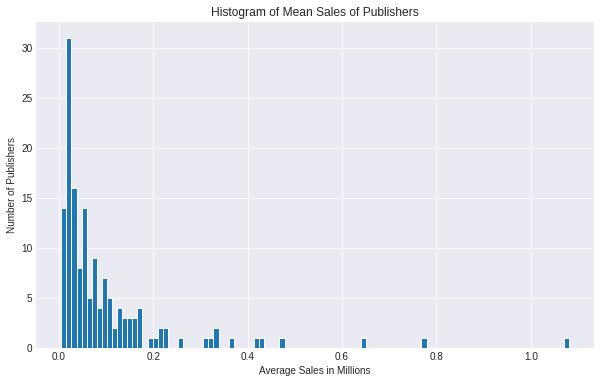

In [ ]:
# mean_df.plot.barh(figsize=(6,7))

mean_df.hist(bins=100, edgecolor='w', figsize=(10, 6))
plt.title('Histogram of Mean Sales of Publishers')
plt.xlabel('Average Sales in Millions')
plt.ylabel('Number of Publishers')
plt.show()

It is evident in the histogram that the vast majority of the publishers in the data set that have `JP_Sales` only reach numbers below 0.2 million average sales and only a very small minority of publishers reach average sales of above 0.6 million. Because of Nintendo's reputation, it would be reasonable to assume that Nintendo is a part of the minority that can reach some of the highest average sales in the histogram. Let us take a look at the mean average sales of Nintendo.

In [ ]:
agg_df.loc['Nintendo']

JP_Sales  mean      0.639723
          std       1.052844
          median    0.275000
Name: Nintendo, dtype: float64

Nintendo has a mean of 0.63 million sales, which means it is among the few publishers who have reached above 0.60 million average sales, but it is not the top performer in average sales. We will be investigating the top 20 publishers in terms of average sales since its confirmed that Nintendo will be in the list according to the histogram.

In [ ]:
top20_df = agg_df.nlargest(20, [('JP_Sales', 'mean')])
top20_df

JP_Sales                 
                                        mean       std median
Publisher                                                    
Enix Corporation                    1.080000  1.202632  0.605
SquareSoft                          0.771731  0.763205  0.590
Nintendo                            0.639723  1.052844  0.275
ASCII Entertainment                 0.470000  0.522887  0.300
Square                              0.433333  0.490170  0.285
Level 5                             0.417586  0.648540  0.190
Aruze Corp                          0.363333  0.228108  0.490
Compile                             0.337143  0.399404  0.160
Laguna                              0.335000  0.093274  0.330
Elf                                 0.320000  0.056569  0.320
Jorudan                             0.310000  0.036056  0.300
BPS                                 0.260000  0.084853  0.260
Hudson Soft                         0.229405  0.305414  0.095
Banpresto                           0.222297  0.258115  0.160
Human Entertainment                 0.216923  0.130664  0.180
Square Enix                         0.216183  0.398413  0.070
ChunSoft                            0.200556  0.251314  0.070
Takara                              0.196250  0.183480  0.145
Sony Computer Entertainment Europe  0.174000  0.264543  0.040
Sammy Corporation                   0.173636  0.292379  0.080

Nintendo is among the top 20 with the 3rd highest average sales. However, its median is low when compared to its average sales which suggests there may be outliers with really high values influencing the mean. These may be the well known Nintendo titles that reach a much higher amount of `JP_Sales` when compared to the rest of Nintendo's library. It will be helpful to see the distribution of the data with a boxplot of the `JP_Sales` including the top 20 publishers for comparison.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


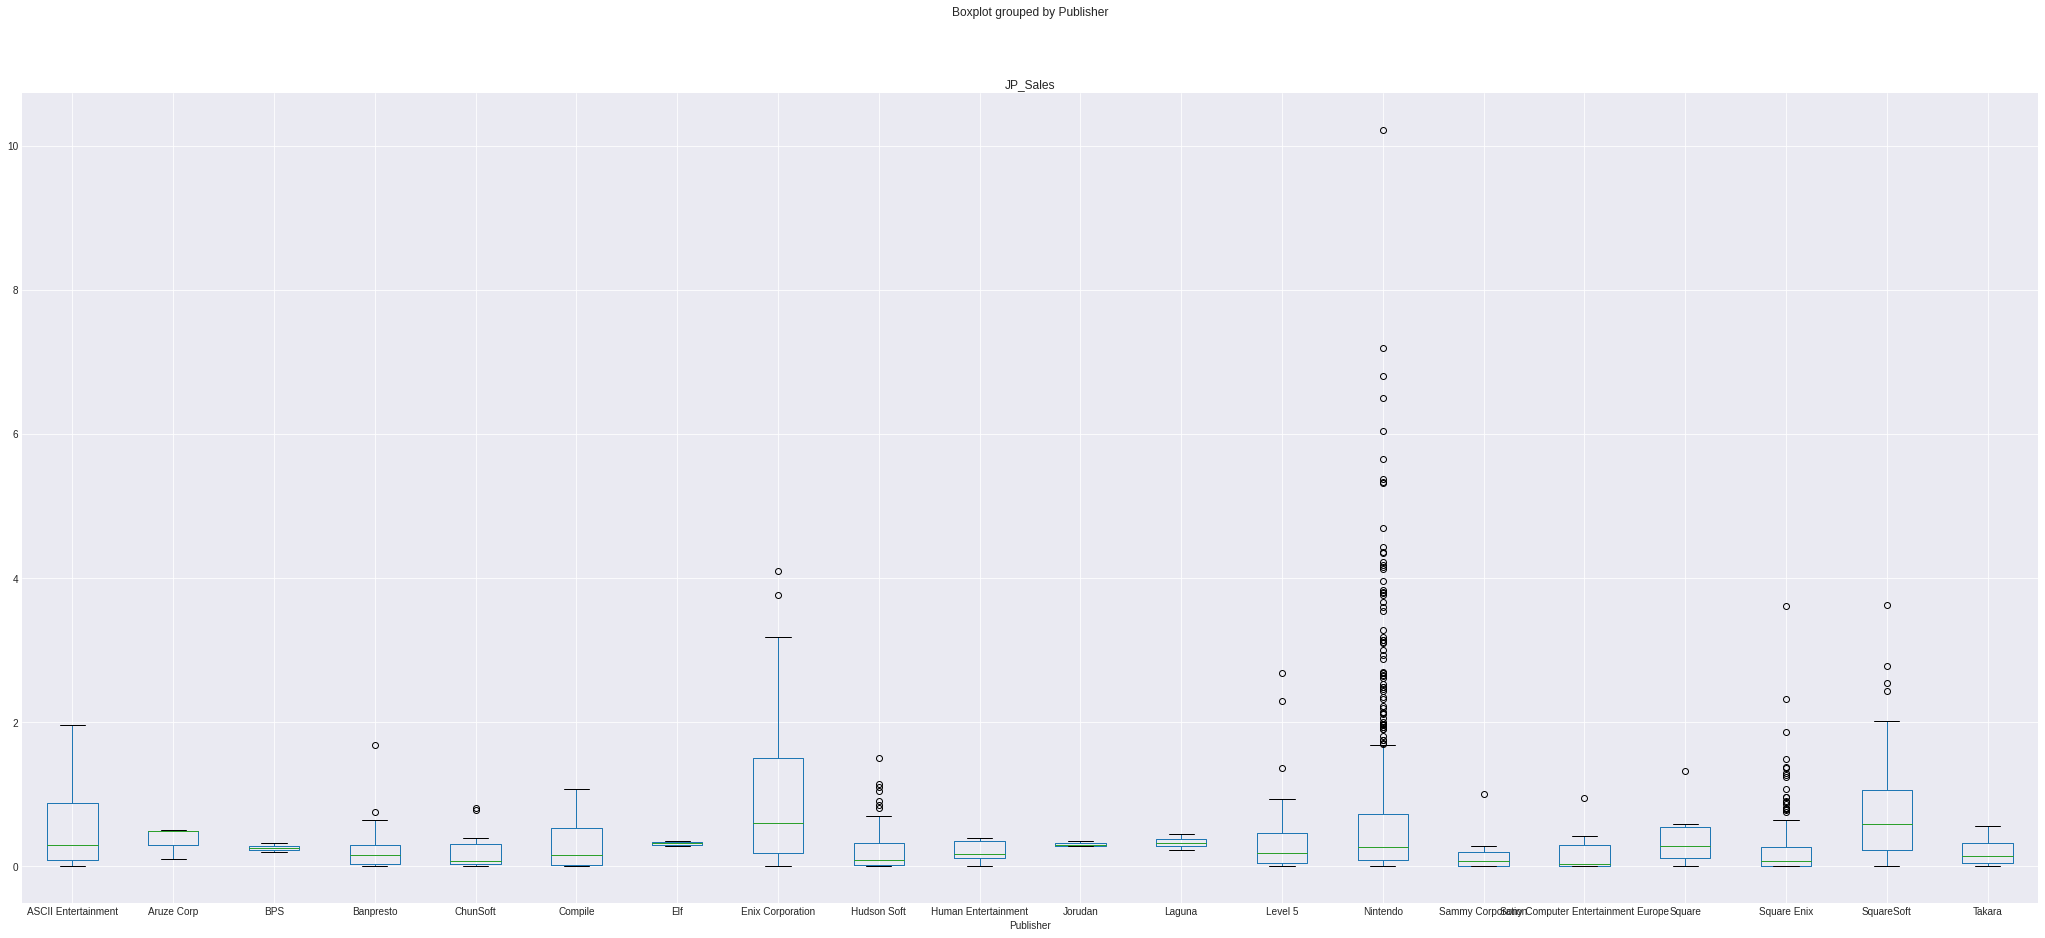

In [ ]:

top20publisher_games_df = cleaned_df.loc[cleaned_df['Publisher'].isin(top20_df.index)]

top20publisher_games_df.boxplot("JP_Sales", by='Publisher', figsize=(35, 15))


The boxplot shows that Nintendo has the most amount of outliers that exceeds the upper whisker. It is predicted that these outliers are Nintendo's extremely popular gaming franchises such as Pokemon and Super Mario Bros. Most games published by Nintendo achieve numbers below 1.7 million in sales according to the boxplot, but games that exceed Nintendo's upper whisker in the box plot makes Nintendo one of the publishers with the highest average sales in Japan despite not having the highest median.

`Enix corporation` and `SquareSoft` have a higher average and median in terms of sales compared to Nintendo despite not reaching the heights of Nintendo having a game sell over 10 million units in `JP_Sales`. `Enix Corporation`'s highest selling game only has 4.1 million sales and `SquareSoft`'s is around 3.8 million games. This may be because `Enix Corporation` and `SquareSoft` has less games overall and when they do make releases, they consistently sell high and within the range of the boxplot because there are less outliers when compared to Nintendo. Both companies also have a higher upper whisker, indicating their consistency when it comes their `JP_Sales`. Let us check the amount of games the top 3 publishers have in the data set.

In [ ]:
print('Amount of Nintendo games:',cleaned_df['Publisher'].value_counts()['Nintendo'])
print('Amount of Enix Corporation games:',cleaned_df['Publisher'].value_counts()['Enix Corporation'])
print('Amount of SquareSoft games:',cleaned_df['Publisher'].value_counts()['SquareSoft'])

Amount of Nintendo games: 722
Amount of Enix Corporation games: 30
Amount of SquareSoft games: 52


It is confirmed that `Enix Corporation` and `SquareSoft` have singificantly less published games compared to Nintendo. The factor of having less games and being more consistent when it comes to reaching generally high `JP_Sales` makes their average `JP_Sales` higher compared to Nintendo.

In [ ]:
cleaned_df[cleaned_df['JP_Sales'] >= 10]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
4,Pokemon Red/Pokemon Blue,G,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37,NaN,NaN,NaN,NaN,NaN


It can be concluded that Nintendo is one of the best performers in terms of `JP_Sales` because of how it is the 3rd highest in the list of average `JP_Sales` that consists of 150 publishers. It is also no easy feat to be the lone publisher with a game that has reached over 10 million sales in Japan alone, which is `Pokemon Red/Pokemon Blue`. But it is also notable how Nintendo is less consistent with the `JP_Sales` of their 720 games in the data set when compared to `SquareSoft` and `Enix Corporation`.

## EDA Question 3: Is there a relationship between the total number of video games in each genre and their total global sales?

Some genres have more video games under their belt than others. We want to see if a higher number of video games means more sales.

The variables of interest are:
- **`Global_Sales`**: total worldwide sales (in millions)
- **`Genre`**: genre of video game

In [ ]:
genre_global_df=cleaned_df[['Genre','Global_Sales']]
genre_global_df

,Genre,Global_Sales
0,Sports,82.54
1,Platform,40.24
2,Racing,35.57
3,Sports,32.78
4,Role-Playing,31.37
...,...,...
17414,Adventure,0.01
17415,Sports,0.01
0,Sports,2.58
1,Platform,1.64


In [ ]:
genre_count=genre_global_df['Genre'].value_counts()
genre_count

Action          3503
Sports          2407
Misc            1813
Role-Playing    1545
Adventure       1478
Shooter         1349
Racing          1282
Simulation       925
Platform         899
Fighting         863
Strategy         734
Puzzle           615
Name: Genre, dtype: int64

We can see here that the three genres with the highest number of games are `Action`, `Sports`, and `Misc`.

In [ ]:
agg_global=genre_global_df.groupby('Genre').agg({'Global_Sales':'sum'})
agg_global['Genre_Count'] = genre_count
agg_global.sort_values('Global_Sales', ascending=False)

,Global_Sales,Genre_Count
Genre,,
Action,1761.97,3503
Sports,1341.00,2407
Shooter,1067.30,1349
Role-Playing,949.31,1545
Platform,831.74,899
Misc,808.80,1813
Racing,731.67,1282
Fighting,449.17,863
Simulation,392.84,925


The three genres with the highest global sales are `Action`, `Sports`, and `Shooter`.

In [ ]:
no_genre_2_total_sales=agg_global
no_genre_2_total_sales.corr()

,Global_Sales,Genre_Count
Global_Sales,1.000000,0.864376
Genre_Count,0.864376,1.000000


There is a high correlation between the number of games and total sales. We can visualize it using a scatter plot:

Text(0.5, 1.0, 'Relationship between total number of genres and total sales')

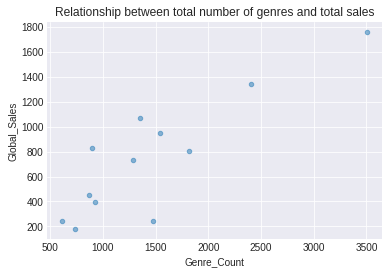

In [ ]:
no_genre_2_total_sales.plot.scatter(x="Genre_Count",y="Global_Sales",alpha=0.5)
plt.title("Relationship between total number of genres and total sales")

As shown in the scatter plot, the relationship between the total number of genres and total sales is positive. This means the more games a genre has, the higher that genre's total sales are.

## IV. Research Question

### **Can the regional sales variables be used to cluster video games and find some meaningful trend within each cluster? If so, which set of features perform well in all regions?**

During the exploratory data analysis, it was found that the regional sales variables (`JP_Sales`, `Other_Sales`, `NA_Sales` , `EU_Sales`) had a very wide range of values and certain properties of each video game played a big factor. It was evident that certain publishers and genres outperformed others significantly.

If we were to cluster video games in the data set based on the distance of their sales variables, video games that performed similarly in terms of sales would be clustered together. Why did they perform similarly? Is there a trend in terms of the other relevant variables? Do video games that have similar performance in terms of sales, which are predicted to be clustered together, have common publishers, genres or platforms that can be found frequently within the cluster? Can we classify which publishers, genres, and platforms typically get lower or higher sales across all regions?

The importance of this is analyzing the common features of games that perform similarly in terms of sales can bring new insights on how to market games and where to market certain games, platform and genre combinations that should be avoided and other trends that can be valuable to the gaming industry.

## V. Data Modeling

In order to answer the research question, we will be using **K-Means Clustering** from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to group the dataset into clusters. Through clustering, we'll be able to see if there is a pattern in the features in each cluster based on the video games' regional sales.

Let's take a look at our dataset again.

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17413 entries, 0 to 2
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17413 non-null  object 
 1   Platform         17413 non-null  object 
 2   Year_of_Release  17413 non-null  int64  
 3   Genre            17413 non-null  object 
 4   Publisher        17413 non-null  object 
 5   NA_Sales         17413 non-null  float64
 6   EU_Sales         17413 non-null  float64
 7   JP_Sales         17413 non-null  float64
 8   Other_Sales      17413 non-null  float64
 9   Global_Sales     17413 non-null  float64
 10  Critic_Score     8333 non-null   float64
 11  Critic_Count     8333 non-null   float64
 12  User_Score       7795 non-null   float64
 13  User_Count       7795 non-null   float64
 14  Rating           10249 non-null  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 2.1+ MB


For clustering, we will categorize the observations by `Platform`, `Year_of_Release`, `Genre`, and `Publisher`. `NA_Sales`, `EU_Sales`, `JP_Sales`, and `Other_Sales` will be used to cluster the dataset.


### Data Preprocessing

Before we start clustering, we will do some additional data preprocessing. Since the `Year_of_Release` values are too specific for the research question, we will instead bin the years by decade.

In [ ]:
cleaned_df.loc[cleaned_df['Year_of_Release'].between(1970, 1979, 'both'), 'Decade_of_Release'] = '1970-1979'
cleaned_df.loc[cleaned_df['Year_of_Release'].between(1980, 1989, 'both'), 'Decade_of_Release'] = '1980-1989'
cleaned_df.loc[cleaned_df['Year_of_Release'].between(1990, 1999, 'both'), 'Decade_of_Release'] = '1990-1999'
cleaned_df.loc[cleaned_df['Year_of_Release'].between(2000, 2009, 'both'), 'Decade_of_Release'] = '2000-2009'
cleaned_df.loc[cleaned_df['Year_of_Release'].between(2010, 2019, 'both'), 'Decade_of_Release'] = '2010-2019'

cleaned_df['Year_of_Release'] = cleaned_df['Decade_of_Release']
del cleaned_df['Decade_of_Release']

In [ ]:
cleaned_df['Year_of_Release'].unique()

array(['2000-2009', '1980-1989', '1990-1999', '2010-2019', '1970-1979'],
      dtype=object)

As seen in the 2nd EDA Question, there are several `Publishers` that have only published one game. As such, said publishers will be aggregated and renamed as "One-Time Publisher"

In [ ]:
one_time_publishers = cleaned_df['Publisher'].value_counts().reset_index(name='Count').query('Count == 1')
cleaned_df.loc[cleaned_df['Publisher'].isin(one_time_publishers['index']), "Publisher"] = "One-Time Publisher"
cleaned_df['Publisher'].value_counts()

Electronic Arts                 1379
Activision                      1005
Namco Bandai Games               972
Ubisoft                          969
Konami Digital Entertainment     865
                                ... 
CTO SpA                            2
MLB.com                            2
Liquid Games                       2
Crimson Cow                        2
Milkstone Studios                  2
Name: Publisher, Length: 419, dtype: int64

### Finding the Optimal k-value

In [ ]:
from sklearn.cluster import KMeans
import sklearn
import sklearn.metrics as sm
from sklearn import datasets

We can try using the [elbow method](https://stackabuse.com/k-means-clustering-with-the-elbow-method/) to determine optimal amount of clusters `k`. 

In [ ]:
X = cleaned_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
distortions = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    

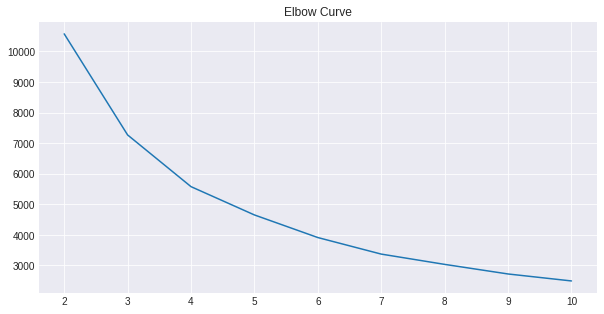

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2,11), distortions)
plt.title('Elbow Curve')
# plt.legend()
plt.show()

We can see from the graph above that the average distances to the centroid starts to stabilize at around `k = 4`. As such, we could divide the dataset into 4 clusters.

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

### Centroids of Each Cluster

In [ ]:
kmeans.cluster_centers_
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
display(centroids)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.134794,0.071500,0.054308,0.024936
1,21.702222,8.913333,3.335556,2.587778
2,1.638219,0.951884,0.255072,0.293219
3,6.502754,4.069275,2.045797,1.229275


Based on the centroids above, we can assume that the dataset was clustered into the following: 
- Cluster 0 - Low Performing Sales
- Cluster 1 - Highest Performing Sales
- Cluster 2 - Middle Performing Sales
- Cluster 3 - High Performing Sales

We can verify this by examining each cluster.

In [ ]:
clustered_df = cleaned_df.assign(Cluster = list(kmeans.labels_))

### Cluster 0 - Low Performing Sales

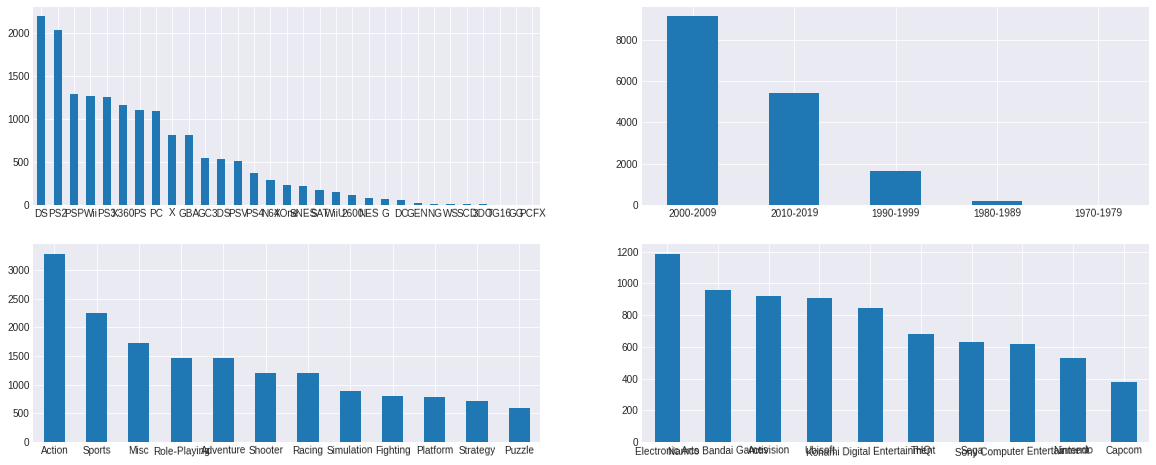

Count:  16367
           NA_Sales      JP_Sales      EU_Sales   Other_Sales
count  16367.000000  16367.000000  16367.000000  16367.000000
mean       0.134695      0.054302      0.071453      0.024928
std        0.191861      0.183181      0.135900      0.067901
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50%        0.060000      0.000000      0.020000      0.010000
75%        0.180000      0.030000      0.080000      0.020000
max        1.200000      4.870000      1.580000      2.930000


In [ ]:
cluster_0 = clustered_df.loc[clustered_df['Cluster'] == 0]
fig, axes = plt.subplots(2,2,figsize=(20,8))
cluster_0['Platform'].value_counts().plot.bar(rot=1, ax=axes[0, 0])
cluster_0['Year_of_Release'].value_counts().plot.bar(rot=1, ax=axes[0, 1])
cluster_0['Genre'].value_counts().plot.bar(rot=1, ax=axes[1, 0])
cluster_0['Publisher'].value_counts().nlargest(10).plot.bar(rot=1, ax=axes[1, 1])
plt.show()
print("Count: ", len(cluster_0))
print(cluster_0[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']].describe())

There are 16,367 video games in Cluster 0. We can see that the average video game sales in this cluster is very low, with the highest sale being `4.87` in `JP_Sales`. It is normal to have most of the games in the low sales cluster since not all games can become blockbusters.
- Most of the games released on the `DS`, `PS2`, and `PSP` generally don't perform well.
- Most games in this cluster was released during `2000-2009`.
- Despite these genres having high overall sales, `Action`, `Sports`, and `Misc`games don't perform well individually.
- Games published by `Electronic Arts`, `Namco Bandai Games`, and `Activision` generally don't have high sales.

### Cluster 1 - Highest Performing Sales

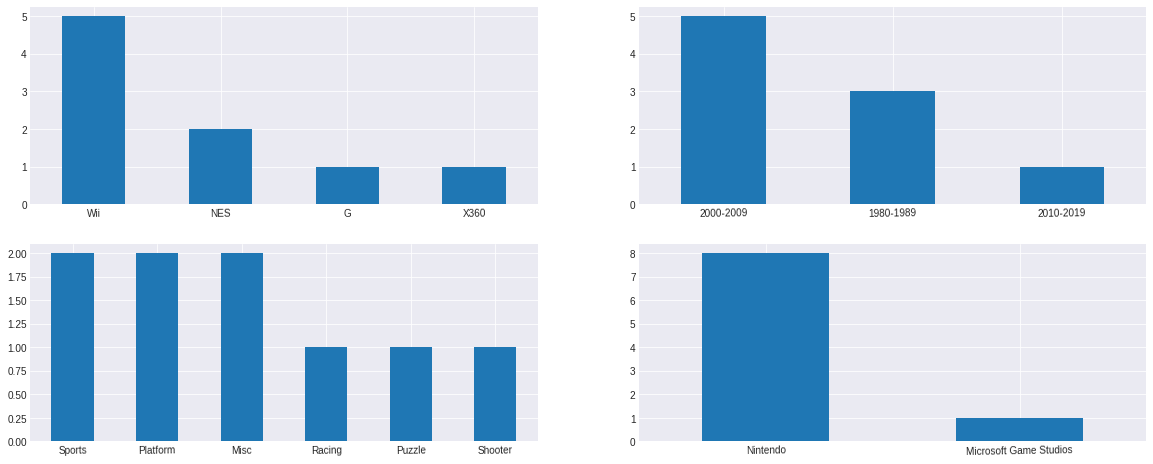

Count:  9
        NA_Sales  JP_Sales   EU_Sales  Other_Sales
count   9.000000  9.000000   9.000000     9.000000
mean   21.702222  3.335556   8.913333     2.587778
std     9.357950  2.067529   8.532295     2.444232
min    13.960000  0.240000   0.630000     0.470000
25%    15.020000  2.930000   3.580000     0.770000
50%    15.680000  3.770000   6.950000     2.250000
75%    26.930000  4.220000  10.950000     2.950000
max    41.360000  6.810000  28.960000     8.450000


In [ ]:
cluster_1 = clustered_df.loc[clustered_df['Cluster'] == 1]
fig, axes = plt.subplots(2,2,figsize=(20,8))
cluster_1['Platform'].value_counts().plot.bar(rot=1, ax=axes[0, 0])
cluster_1['Year_of_Release'].value_counts().plot.bar(rot=1, ax=axes[0, 1])
cluster_1['Genre'].value_counts().plot.bar(rot=1, ax=axes[1, 0])
cluster_1['Publisher'].value_counts().nlargest(10).plot.bar(rot=1, ax=axes[1, 1])
plt.show()
print("Count: ", len(cluster_1))
print(cluster_1[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']].describe())

There are only 9 video games in Cluster 1. These are the games that have very high sales globally compared to the others making them blockbusters.
- Five out the nine games were on the `Wii`, despite most of the games in the platform performing poorly.
- Most games in this cluster was released during `2000-2009`.
- The most frequent genres in this cluster are `Sports`, `Platform` and `Misc`.
- Eight of the nine games were published by `Nintendo`, with only one game from `Microsoft Game Studios` competing in terms of sales. This is most likely because `Nintendo` also owns the `Wii`.

In [ ]:
cluster_1.loc[cluster_1['Publisher'] == "Microsoft Game Studios"]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Cluster
14,Kinect Adventures!,X360,2010-2019,Misc,Microsoft Game Studios,15.02,4.91,0.24,1.69,21.86,61.0,45.0,6.3,106.0,E,1


### Cluster 2 - Middle Performing Sales

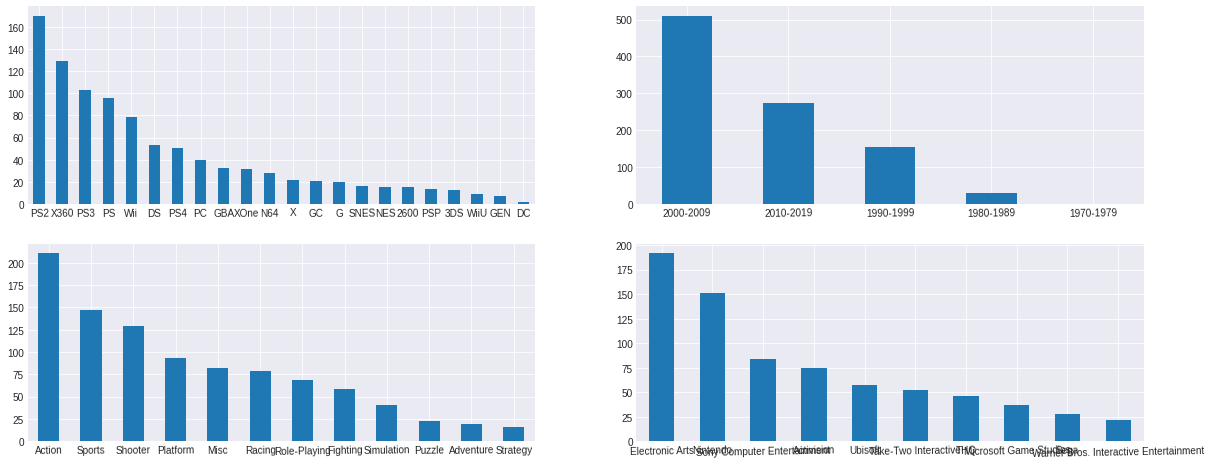

Count:  968
         NA_Sales    JP_Sales    EU_Sales  Other_Sales
count  968.000000  968.000000  968.000000   968.000000
mean     1.636777    0.254752    0.950857     0.292800
std      0.801184    0.557804    0.800849     0.351108
min      0.020000    0.000000    0.000000     0.000000
25%      1.070000    0.000000    0.440000     0.110000
50%      1.440000    0.030000    0.770000     0.220000
75%      2.030000    0.172500    1.252500     0.380000
max      4.980000    4.430000    6.750000     7.530000


In [ ]:
cluster_2 = clustered_df.loc[clustered_df['Cluster'] == 2]
fig, axes = plt.subplots(2,2,figsize=(20,8))
cluster_2['Platform'].value_counts().plot.bar(rot=1, ax=axes[0, 0])
cluster_2['Year_of_Release'].value_counts().plot.bar(rot=1, ax=axes[0, 1])
cluster_2['Genre'].value_counts().plot.bar(rot=1, ax=axes[1, 0])
cluster_2['Publisher'].value_counts().nlargest(10).plot.bar(rot=1, ax=axes[1, 1])
plt.show()
print("Count: ", len(cluster_2))
print(cluster_2[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']].describe())

There are 968 video games in Cluster 2. We can see the games here have higher average in sales in each region compared to Cluster 0.
- Games that performed decently were released on the `PS2`, and `X360` and `PS3`.
- Most games in this cluster was released during `2000-2009`.
- Games that performed decently belong to the `Action`, and `Sports`, and `Shooter` genres.
- Games published by `Electronic Arts`, `Nintendo`, and `Sony Computer Entertainment` generally perform decently. However, most of `Electronic Arts` games are in Cluster 0.

### Cluster 3 - High Performing Sales

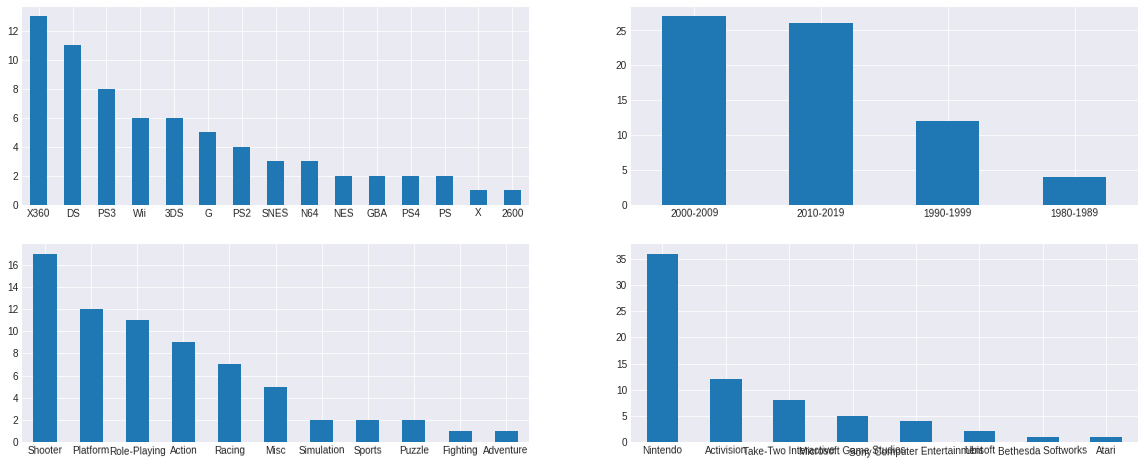

Count:  69
        NA_Sales   JP_Sales   EU_Sales  Other_Sales
count  69.000000  69.000000  69.000000    69.000000
mean    6.502754   2.045797   4.069275     1.229275
std     2.176463   2.159046   2.207326     1.359703
min     2.500000   0.000000   0.400000     0.080000
25%     4.990000   0.140000   2.710000     0.630000
50%     6.000000   1.690000   3.600000     0.910000
75%     7.970000   3.120000   5.040000     1.410000
max    12.780000  10.220000  10.950000    10.570000


In [ ]:
cluster_3 = clustered_df.loc[clustered_df['Cluster'] == 3]
fig, axes = plt.subplots(2,2,figsize=(20,8))
cluster_3['Platform'].value_counts().plot.bar(rot=1, ax=axes[0, 0])
cluster_3['Year_of_Release'].value_counts().plot.bar(rot=1, ax=axes[0, 1])
cluster_3['Genre'].value_counts().plot.bar(rot=1, ax=axes[1, 0])
cluster_3['Publisher'].value_counts().nlargest(10).plot.bar(rot=1, ax=axes[1, 1])
plt.show()
print("Count: ", len(cluster_3))
print(cluster_3[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']].describe())

There are 69 video games in Cluster 3. We can see the games here have higher average in sales in each region compared to Cluster 0 and Cluster 3. This means that these are the games the performed the best in sales, but not so high to reach the "blockbuster" status of Cluster 1.
- The most popular games in terms of sales are released on the `X360`, and `DS` and `PS3`.
- Most games in this cluster was released during `2000-2009`, with `2010-2019` coming a close second.
- The most common genres in this cluster are `Shooter`, `Platform`, and `Role-Playing`.
- Games published by `Nintendo` typically get high sales, followed by `Activision` and `Take-Two Entertainment`.

# VI. Statistical Inference


In [ ]:
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

Through clustering, it was found that the frequency of various categorical variables (`Genre`, `Year_of_Release`, `Platform`) varied for each cluster. Using the new `Cluster` as a measure of sales performance, it would be interesting to see if the sales performance (a video game being in C0, C1, C2, OR C3) is dependent on the aforementioned categorical variables with a chi square test of independence.

## Test of independence: Genre

Test of Independence

Hypotheses:

$H_0$ (null hypothesis): The sales performance of a video game is not dependent on its genre.

$H_A$ (alternative hypothesis):  The sales performance of a video game is dependent on its genre.

In [ ]:
separate_groups = clustered_df.groupby('Cluster',  axis=0)

frequency = separate_groups['Genre'].value_counts()
frequency

Cluster  Genre       
0        Action          3283
         Sports          2256
         Misc            1724
         Role-Playing    1465
         Adventure       1458
         Shooter         1202
         Racing          1195
         Simulation       882
         Fighting         803
         Platform         792
         Strategy         718
         Puzzle           589
1        Misc               2
         Platform           2
         Sports             2
         Puzzle             1
         Racing             1
         Shooter            1
2        Action           211
         Sports           147
         Shooter          129
         Platform          93
         Misc              82
         Racing            79
         Role-Playing      69
         Fighting          59
         Simulation        41
         Puzzle            23
         Adventure         19
         Strategy          16
3        Shooter           17
         Platform          12
         Role-Play

In [ ]:
chi_table = pd.DataFrame([frequency[0], frequency[1], frequency[2], frequency[3]], index=['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3'])
# replace NaN with 0
chi_table = chi_table.replace([np.NaN], 0)                                                                     
chi_table

Genre,Action,Sports,Misc,Role-Playing,Adventure,Shooter,Racing,Simulation,Fighting,Platform,Strategy,Puzzle
Cluster 0,3283.0,2256.0,1724.0,1465.0,1458.0,1202.0,1195.0,882.0,803.0,792.0,718.0,589.0
Cluster 1,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0
Cluster 2,211.0,147.0,82.0,69.0,19.0,129.0,79.0,41.0,59.0,93.0,16.0,23.0
Cluster 3,9.0,2.0,5.0,11.0,1.0,17.0,7.0,2.0,1.0,12.0,0.0,2.0


In [ ]:
chitest = chi2_contingency(chi_table)
chitest

(251.4571319143182,
 1.9029789725462992e-35,
 33,
 array([[3.29257457e+03, 2.26241136e+03, 1.70409298e+03, 1.45219175e+03,
         1.38921645e+03, 1.26796549e+03, 1.20499018e+03, 8.69435192e+02,
         8.11159536e+02, 8.44997014e+02, 6.89908574e+02, 5.78056912e+02],
        [1.81054385e+00, 1.24407052e+00, 9.37058519e-01, 7.98541320e-01,
         7.63912020e-01, 6.97237696e-01, 6.62608396e-01, 4.78091081e-01,
         4.46046058e-01, 4.64652846e-01, 3.79371734e-01, 3.17865962e-01],
        [1.94734049e+02, 1.33806696e+02, 1.00785850e+02, 8.58875553e+01,
         8.21629817e+01, 7.49917877e+01, 7.12672142e+01, 5.14213519e+01,
         4.79747315e+01, 4.99759949e+01, 4.08035376e+01, 3.41882502e+01],
        [1.38808362e+01, 9.53787400e+00, 7.18411532e+00, 6.12215012e+00,
         5.85665882e+00, 5.34548900e+00, 5.07999770e+00, 3.66536496e+00,
         3.41968644e+00, 3.56233848e+00, 2.90851663e+00, 2.43697238e+00]]))

In [ ]:
print('p-value:', chitest[1])

p-value: 1.9029789725462992e-35


With a significance level of 5% and a p value well below 0.05, there is strong evidence to conclude that the sales performance of a video game is dependent on its genre, using the clusters the video games belong to as a measure of sales performance.

##  Test of independence: Platform

Test of Independence

Hypotheses:

$H_0$ (null hypothesis): The sales performance of a video game is not dependent on its platform.

$H_A$ (alternative hypothesis):  The sales performance of a video game is dependent on its platform.

In [ ]:
separate_groups = clustered_df.groupby('Cluster',  axis=0)

frequency = separate_groups['Platform'].value_counts()
frequency

Cluster  Platform
0        DS          2187
         PS2         2032
         PSP         1290
         Wii         1269
         PS3         1249
                     ... 
3        NES            2
         PS             2
         PS4            2
         2600           1
         X              1
Name: Platform, Length: 72, dtype: int64

In [ ]:
chi_table = pd.DataFrame([frequency[0], frequency[1], frequency[2], frequency[3]], index=['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3'])
chi_table = chi_table.replace([np.NaN], 0)                                                                     
chi_table                                                             

Platform,DS,PS2,PSP,Wii,PS3,X360,PS,PC,X,GBA,...,G,DC,GEN,NG,WS,SCD,3DO,TG16,GG,PCFX
Cluster 0,2187.0,2032.0,1290.0,1269.0,1249.0,1154.0,1102.0,1088.0,810.0,809.0,...,72.0,50.0,20.0,12.0,7.0,6.0,3.0,2.0,1.0,1.0
Cluster 1,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cluster 2,53.0,170.0,14.0,79.0,103.0,129.0,96.0,40.0,22.0,33.0,...,20.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cluster 3,11.0,4.0,0.0,6.0,8.0,13.0,2.0,0.0,1.0,2.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
chitest = chi2_contingency(chi_table)
chitest

(663.0080065848814,
 3.6996708792229516e-88,
 90,
 array([[2.11578229e+03, 2.07348544e+03, 1.22566864e+03, 1.27736478e+03,
         1.27830471e+03, 1.21908913e+03, 1.12791592e+03, 1.06024097e+03,
         7.82961638e+02, 7.93300867e+02, 5.29180555e+02, 5.19781255e+02,
         4.72784759e+02, 3.98530293e+02, 2.99837650e+02, 2.48141503e+02,
         2.24643255e+02, 1.62607879e+02, 1.43809280e+02, 1.25010682e+02,
         9.21131339e+01, 9.21131339e+01, 4.88763567e+01, 2.53781083e+01,
         1.12791592e+01, 6.57950956e+00, 5.63957962e+00, 2.81978981e+00,
         1.87985987e+00, 9.39929937e-01, 9.39929937e-01],
        [1.16344111e+00, 1.14018262e+00, 6.73979211e-01, 7.02406248e-01,
         7.02923103e-01, 6.70361224e-01, 6.20226268e-01, 5.83012692e-01,
         4.30540401e-01, 4.36225808e-01, 2.90989491e-01, 2.85820938e-01,
         2.59978177e-01, 2.19146615e-01, 1.64876816e-01, 1.36449779e-01,
         1.23528398e-01, 8.94159536e-02, 7.90788491e-02, 6.87417447e-02,
         5.06518

In [ ]:
print('p-value:', chitest[1])

p-value: 3.6996708792229516e-88


With a significance level of 5% and a p value well below 0.05, there is strong evidence to conclude that the sales performance of a video game is dependent on the platform its available on, using the clusters the video games belong to as a measure of sales performance.

##  Test of independence: Year of Release

Test of Independence

Hypotheses:

$H_0$ (null hypothesis): The sales performance of a video game is not dependent on its year of release.

$H_A$ (alternative hypothesis):  The sales performance of a video game is dependent on its year of release.

In [ ]:
separate_groups = clustered_df.groupby('Cluster',  axis=0)

frequency = separate_groups['Year_of_Release'].value_counts()
frequency

Cluster  Year_of_Release
0        2000-2009          9140
         2010-2019          5426
         1990-1999          1617
         1980-1989           176
         1970-1979             8
1        2000-2009             5
         1980-1989             3
         2010-2019             1
2        2000-2009           510
         2010-2019           274
         1990-1999           154
         1980-1989            29
         1970-1979             1
3        2000-2009            27
         2010-2019            26
         1990-1999            12
         1980-1989             4
Name: Year_of_Release, dtype: int64

In [ ]:
chi_table = pd.DataFrame([frequency[0], frequency[1], frequency[2], frequency[3]], index=['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3'])
chi_table = chi_table.replace([np.NaN], 0)                                                                     
chi_table                                                             

Year_of_Release,2000-2009,2010-2019,1990-1999,1980-1989,1970-1979
Cluster 0,9140.0,5426.0,1617.0,176.0,8.0
Cluster 1,5.0,1.0,0.0,3.0,0.0
Cluster 2,510.0,274.0,154.0,29.0,1.0
Cluster 3,27.0,26.0,12.0,4.0,0.0


In [ ]:
chitest = chi2_contingency(chi_table)
chitest

(166.71150411170936,
 2.2442634495979343e-29,
 12,
 array([[9.10040165e+03, 5.38297875e+03, 1.67589508e+03, 1.99265147e+02,
         8.45936944e+00],
        [5.00419227e+00, 2.96002986e+00, 9.21552863e-01, 1.09573307e-01,
         4.65169701e-03],
        [5.38228680e+02, 3.18367656e+02, 9.91181301e+01, 1.17852179e+01,
         5.00315856e-01],
        [3.83654741e+01, 2.26935623e+01, 7.06523861e+00, 8.40062023e-01,
         3.56630104e-02]]))

In [ ]:
print('p-value:', chitest[1])

p-value: 2.2442634495979343e-29


With a significance level of 5% and a p value well below 0.05, there is strong evidence to conclude that the sales performance of a video game is dependent on its decade of release, using the clusters the video games belong to as a measure of sales performance.

Since there are too many values for `Publisher`, there will be lot of 0 values in each cluster. Thus, we cannot perform the chi-square test on it.

# VII. Insights and Conclusions

Through K-means clustering the regional sales variables,  it was found through the elbow method that the optimal number of clusters to use when using the regional sales variables is 4. Upon inspecting the data points of each cluster set there was a 
clear trend: the dataset was clustered based on its sales performance across all regions. Thus, we are able to build a sales profile from the data.
- `Cluster 0` had games with the lowest performing sales which made it have the most data points
- `Cluster 1` had games that reached highest numbers across all the games in the dataset which made it have the least amount of data points
- `Cluster 2` had games that reached generally decent numbers.
- `Cluster 3` had games with generally high performing sales but these games did not reach the heights `Cluster 1` games had reached.
<br><br>
The platforms that have the lowest sales belong to the `DS`, `PS2` and `PSP`, with the first two having the highest amount of games. The prominent platforms in the middle and high sales clusters are `X360` and `PS3`.
<br><br>
The video games with the highest sales in terms of genre across all regions are `Shooter`, `Plaform`, and `Role-Playing`. Despite their high overall sales, most of the `Action`, `Sports`, and `Misc` genres were on `Cluster 0`. Thus, we can attribute their high sales to their high frequency count.
<br><br>
Out of all the top Publishers, `Nintendo` publishes the highest performing games. Meanwhile, `Electronic Arts`, `Activision` and `Namco Bandai` have a lot of published games but they tend to only get low to middle sales.
<br><br>
Due to the sheer amount of games released in `2000-2009`, it dominated every cluster. However, the `2010-2019` games came a close second in the high sales cluster. This means that newer releases tend to sale better than older ones.
<br><br>
Chi square tests of independence were done between the `Cluster` variable that indicated a video game’s assigned cluster, and other categorical variables such as `Platform`, `Genre`,  and `Year_of_Release`. The `Cluster` variable represented a video game’s performance in sales. It was found that there is strong evidence that the performance in sales can be dependent on the aformentioned categorical variables of each video game, which provides a stronger bases for the trends found in each cluster wherein certain genres and platforms were more frequently found in certain clusters compared to others.
<br><br>
Through this analysis, we realized that having a game belonging to the most popular genre, publisher, or platform doesn't necessarily guarantee it having high sales. In fact, most of the top genres, publishers, and platforms only receive low sales minus a few exceptions. Nonetheless, this analysis helped us gain insight on how different genres, publishers, and platforms perform on sales across all regions.